In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
snodjup = pd.read_pickle("../Dataframes/df_snow_save.pkl")

- Snödjupet är taget från Säve mellan 1944 och 2003

In [4]:
snodjup['Datum'] = pd.to_datetime(snodjup['Datum'])
snodjup['Year'] = snodjup['Datum'].dt.year
snodjup['Month'] = snodjup['Datum'].dt.month
snodjup

,Datum,Tid_UTC,Snödjup,Kvalitet,Markens_tillstånd,Kvalitet_1,Month,Year,Snittdjup_per_dag_för_månaden
0,1944-01-01,07:00:00,0.0,G,0,G,1,1944,0.01
1,1944-01-02,07:00:00,0.0,G,0,G,1,1944,0.01
2,1944-01-03,07:00:00,0.0,G,0,G,1,1944,0.01
3,1944-01-04,07:00:00,0.0,G,0,G,1,1944,0.01
4,1944-01-05,07:00:00,0.0,G,0,G,1,1944,0.01
...,...,...,...,...,...,...,...,...,...
15181,2002-11-24,06:00:00,0.0,G,2,G,11,2002,0.00
15182,2002-11-25,06:00:00,0.0,G,2,G,11,2002,0.00
15183,2002-11-26,06:00:00,0.0,G,2,G,11,2002,0.00
15184,2002-11-30,06:00:00,0.0,G,11,G,11,2002,0.00


In [5]:
snodjup2 = snodjup.query("Snödjup >= .01")
snodjup2

,Datum,Tid_UTC,Snödjup,Kvalitet,Markens_tillstånd,Kvalitet_1,Month,Year,Snittdjup_per_dag_för_månaden
8,1944-01-09,07:00:00,0.04,G,17,G,1,1944,0.01
9,1944-01-10,07:00:00,0.05,G,17,G,1,1944,0.01
10,1944-01-11,07:00:00,0.05,G,17,G,1,1944,0.01
11,1944-01-12,07:00:00,0.05,G,17,G,1,1944,0.01
12,1944-01-13,07:00:00,0.05,G,17,G,1,1944,0.01
...,...,...,...,...,...,...,...,...,...
14980,2002-02-26,06:00:00,0.03,G,17,G,2,2002,0.00
14981,2002-02-27,06:00:00,0.02,G,13,G,2,2002,0.00
15159,2002-10-19,06:00:00,0.21,G,13,G,10,2002,0.02
15160,2002-10-20,06:00:00,0.20,G,13,G,10,2002,0.02


In [6]:
snodjup3 = snodjup

In [7]:
def period(row):
  if row['Month'] < 7:
    return f"Sommar {row['Year'] - 1} - Vinter {row['Year']}"
  else:
    return f"Vinter {row['Year']} - Sommar {row['Year'] + 1}"

snodjup3['Årsperiod'] = snodjup3.apply(period, axis=1)

df_period = snodjup3.groupby('Årsperiod')['Snödjup'].sum().reset_index()

In [8]:
def period2(row):
  if row['Month'] < 7:
    return row['Month'] + 6
  else:
    return row['Month'] - 6

snodjup3['Vinterjustering'] = snodjup3.apply(period2, axis=1)

df_period2 = snodjup3.groupby('Vinterjustering')['Snödjup'].sum().reset_index()



In [9]:
snodjup3['Vinterår'] = snodjup3['Year']-1

In [10]:
snodjup3

,Datum,Tid_UTC,Snödjup,Kvalitet,Markens_tillstånd,Kvalitet_1,Month,Year,Snittdjup_per_dag_för_månaden,Årsperiod,Vinterjustering,Vinterår
0,1944-01-01,07:00:00,0.0,G,0,G,1,1944,0.01,Sommar 1943 - Vinter 1944,7,1943
1,1944-01-02,07:00:00,0.0,G,0,G,1,1944,0.01,Sommar 1943 - Vinter 1944,7,1943
2,1944-01-03,07:00:00,0.0,G,0,G,1,1944,0.01,Sommar 1943 - Vinter 1944,7,1943
3,1944-01-04,07:00:00,0.0,G,0,G,1,1944,0.01,Sommar 1943 - Vinter 1944,7,1943
4,1944-01-05,07:00:00,0.0,G,0,G,1,1944,0.01,Sommar 1943 - Vinter 1944,7,1943
...,...,...,...,...,...,...,...,...,...,...,...,...
15181,2002-11-24,06:00:00,0.0,G,2,G,11,2002,0.00,Vinter 2002 - Sommar 2003,5,2001
15182,2002-11-25,06:00:00,0.0,G,2,G,11,2002,0.00,Vinter 2002 - Sommar 2003,5,2001
15183,2002-11-26,06:00:00,0.0,G,2,G,11,2002,0.00,Vinter 2002 - Sommar 2003,5,2001
15184,2002-11-30,06:00:00,0.0,G,11,G,11,2002,0.00,Vinter 2002 - Sommar 2003,5,2001


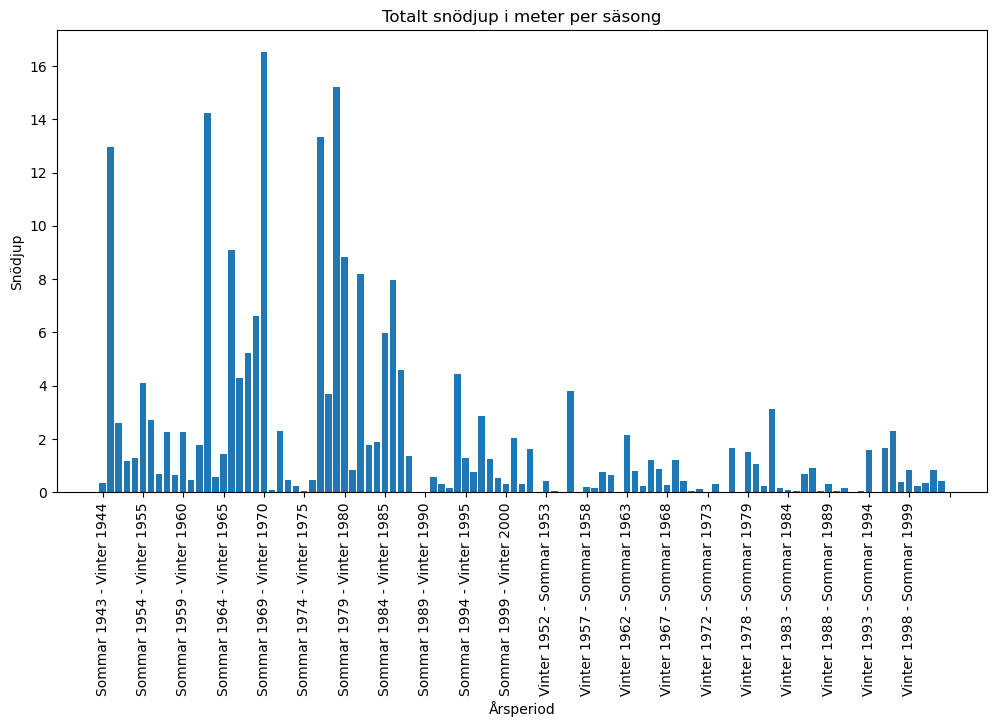

In [11]:
plt.figure(figsize=(12, 6))
plt.bar(df_period['Årsperiod'], df_period['Snödjup'])
plt.xlabel('Årsperiod')
plt.ylabel('Snödjup')
plt.title('Totalt snödjup i meter per säsong')
plt.xticks(rotation=90, ticks=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105])
plt.show()

c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Vinterjustering', ylabel='Snödjup'>

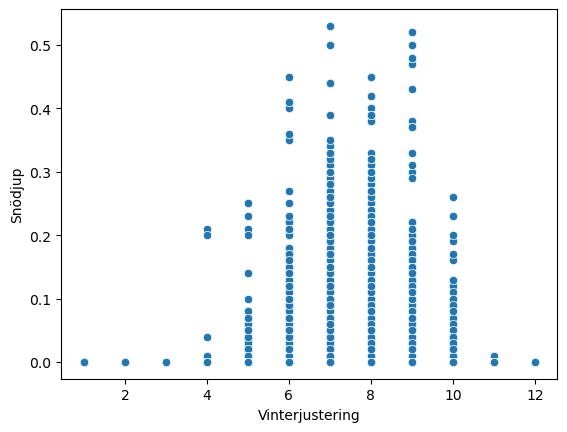

In [12]:
sns.scatterplot(data=snodjup3, x='Vinterjustering', y='Snödjup')

Snödjup är räknat i antal meter, minimum 0.01 (1 cm)

c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


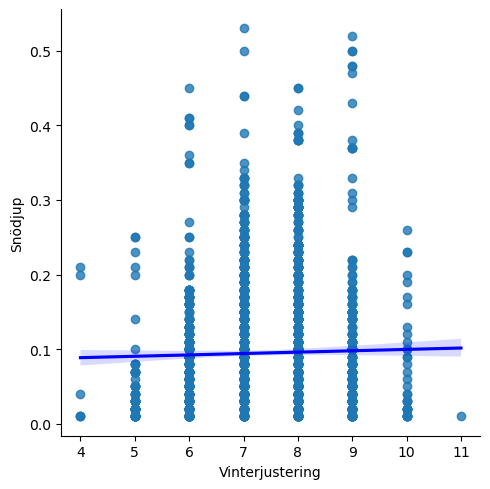

In [13]:
snodjup4 = snodjup3.query("Snödjup >= .01")
sns.lmplot(data = snodjup4, x = 'Vinterjustering', y = 'Snödjup', line_kws={'color' : 'blue'})

Denna grafen visar egentligen bara att det ligger kvar mer snö i slutet av säsongen än i tidiga säsongen

c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Month', ylabel='Snödjup'>

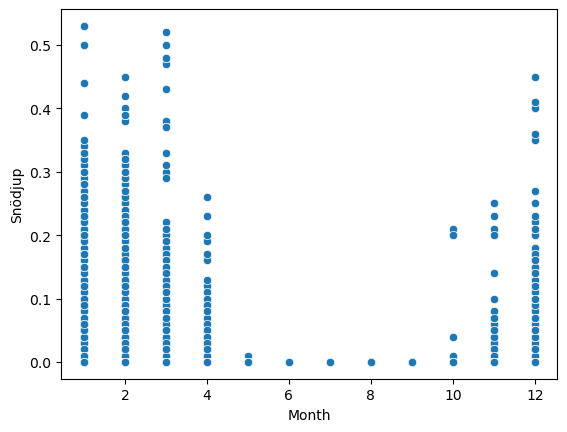

In [14]:
sns.scatterplot(data= snodjup, x='Month', y = 'Snödjup')

In [15]:
print("Snödjup i meter")
print(f"Minsta snödjup: {snodjup['Snödjup'].min()}")
print(f"Medelsnödjup över alla år: {snodjup['Snödjup'].mean()}")
print(f"Max uppmätta snödjupet: {snodjup['Snödjup'].max()}")

Snödjup i meter
Minsta snödjup: 0.0
Medelsnödjup över alla år: 0.01430784442979565
Max uppmätta snödjupet: 0.53


c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

<Axes: xlabel='Month', ylabel='Snödjup'>

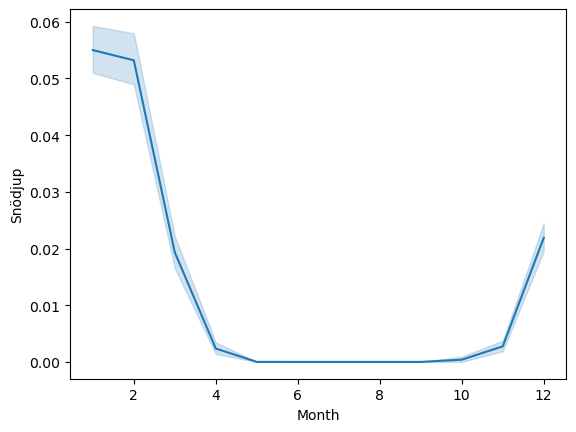

In [16]:
sns.lineplot(data=snodjup, x = 'Month', y = 'Snödjup')

Det ser ju ändå rimligt ut att ingen av observationerna skett mellan Juni och September i Göteborg för perioden

c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


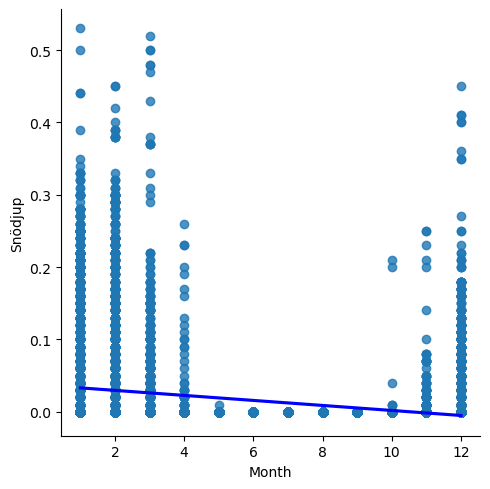

In [17]:
sns.lmplot(data = snodjup, x = 'Month', y = 'Snödjup', line_kws={'color' : 'blue'})

c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


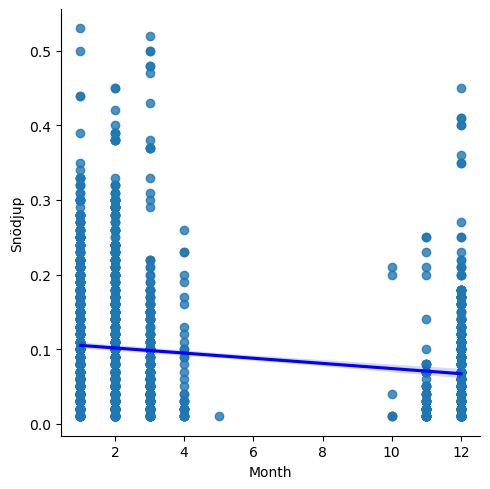

In [18]:
sns.lmplot(data = snodjup2, x = 'Month', y = 'Snödjup', line_kws={'color' : 'blue'})

Det är mindre snö i slutet av året än i början på året vilket inte så konstigt egentligen med tanke på att majoriteten av vintermånaderna är i början på året

In [20]:
sno10 = snodjup3.query("Snödjup >= .1")
sno20 = snodjup3.query("Snödjup >= .2")
sno30 = snodjup3.query("Snödjup >= .3")
sno40 = snodjup3.query("Snödjup >= .4")
sno50 = snodjup3.query("Snödjup >= .5")

In [27]:
print(f"Antal dagar med snödjup över 10 cm: {len(sno10['Datum'].unique())}")
print(f"Antal dagar med snödjup över 20 cm: {len(sno20['Datum'].unique())}")
print(f"Antal dagar med snödjup över 30 cm: {len(sno30['Datum'].unique())}")
print(f"Antal dagar med snödjup över 40 cm: {len(sno40['Datum'].unique())}")
print(f"Antal dagar med snödjup över 50 cm: {len(sno50['Datum'].unique())}")

Antal dagar med snödjup över 10 cm: 853
Antal dagar med snödjup över 20 cm: 289
Antal dagar med snödjup över 30 cm: 75
Antal dagar med snödjup över 40 cm: 20
Antal dagar med snödjup över 50 cm: 5


In [39]:
def count_10_year_intervals(data):
    data = data.drop_duplicates(subset='Datum')
    bins = list(range(1944, 2005, 10))
    interval_counts = sno10.groupby(pd.cut(data['Year'], bins=bins), observed=True).size()
    return interval_counts

In [43]:
print(count_10_year_intervals(sno10))
print(count_10_year_intervals(sno20))
print(count_10_year_intervals(sno30))
print(count_10_year_intervals(sno40))
print(count_10_year_intervals(sno50))

Year
(1944, 1954]     75
(1954, 1964]    150
(1964, 1974]    186
(1974, 1984]    271
(1984, 1994]    102
(1994, 2004]     69
dtype: int64
Year
(1944, 1954]     35
(1954, 1964]     42
(1964, 1974]     76
(1974, 1984]    108
(1984, 1994]     18
(1994, 2004]     10
dtype: int64
Year
(1944, 1954]     7
(1954, 1964]    11
(1964, 1974]    33
(1974, 1984]    24
dtype: int64
Year
(1944, 1954]     4
(1954, 1964]     5
(1964, 1974]    11
dtype: int64
Year
(1944, 1954]    2
(1964, 1974]    3
dtype: int64
